In [10]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\raghu\H501-Projects\Data-science-project\Commodity_Price_Stremlit\data\predicted_prices.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the DataFrame


countries = sorted(df['country_name'].unique())
print(countries)


['Azerbaijan', 'Bangladesh', 'Bhutan', 'Cambodia', 'Colombia', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jordan', "Lao People's Democratic Republic", 'Lebanon', 'Myanmar', 'Nepal', 'Pakistan', 'Panama', 'Philippines', 'Sri Lanka', 'Syrian Arab Republic']


Filtering dataset to countries that include Costa Rica, 
El Salvado, 
Guatema, a
Hondu, as
Pa, and ama
Col.ombia

In [2]:
# Define the list of countries to filter
countries = ['Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Panama', 'Colombia']

# Filter the DataFrame based on the adm0_name column
filtered_df = df[df['adm0_name'].isin(countries)]

# Display the filtered DataFrame
filtered_df.sample(10)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
102624,75,El Salvador,1185,Cabanas,162,Sensuntepeque,79,Beans (silk red),28,USD,14,Wholesale,16,45 KG,4,2010,42.500,FDTA-Valles
144511,103,Guatemala,0,NaN,200,National Average,114,Tomatoes,82,GTQ,15,Retail,30,Pound,11,2012,5.080,National Institute of Statistics
50052,57,Colombia,948,Cundinamarca,840,Bogota,78,Beans (red),67,COP,14,Wholesale,5,KG,8,2008,4593.000,AGRONET
101852,75,El Salvador,1195,Santa Ana,161,Santa Ana,52,Rice,28,USD,14,Wholesale,16,45 KG,7,2012,39.000,Ministry of Agriculture
56782,57,Colombia,961,Santander,852,Bucaramanga,110,Onions (red),67,COP,14,Wholesale,5,KG,7,2016,2826.000,http://www.centroabastos.com/web/
103771,75,El Salvador,1189,La Paz,165,Zacatecoluca,67,Maize (white),28,USD,14,Wholesale,16,45 KG,10,2010,15.375,FDTA-Valles
53927,57,Colombia,935,Antioquia,842,Medellin,133,Rice (white),67,COP,14,Wholesale,18,MT,7,2015,2488888.000,http://www.lamayorista.com.co
102964,75,El Salvador,1196,Sonsonate,163,Sonsonate,78,Beans (red),28,USD,14,Wholesale,16,45 KG,1,2010,39.000,FDTA-Valles
60447,61,Costa Rica,0,NaN,300,National Average,67,Maize (white),28,USD,14,Wholesale,18,MT,11,2010,673.562,CAC
53406,57,Colombia,935,Antioquia,842,Medellin,78,Beans (red),67,COP,14,Wholesale,5,KG,5,2008,4143.000,AGRONET


Writing filtered dataset into new CSV file for reference.

In [3]:
# Define the full file path, including the CSV file name
output_file_path = r"C:\Users\Prana\OneDrive\Documents\Data Science Prog (FA24)\Project\filtered_wfp_market_food_prices.csv"

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv(output_file_path, index=False)

# Data Cleaning

Changing columns name of few columns for easier readibility

In [4]:
# Rename the columns in filtered_df
filtered_df = filtered_df.rename(columns={
    'adm0_id' : 'Country_id',
    'adm0_name': 'Country',
    'adm1_id': 'locality_id',
    'adm1_name': 'locality_name',
    'pt_id': 'mk_type_id',
    'pt_name': 'mk_type_name'
})

# Display the updated filtered DataFrame with new column names
filtered_df.sample(10)

,Country_id,Country,locality_id,locality_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,mk_type_id,mk_type_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
51705,57,Colombia,948,Cundinamarca,840,Bogota,215,"Sugar (brown, loaf)",67,COP,14,Wholesale,5,KG,12,2007,1661.0000,AGRONET
98332,75,El Salvador,1196,Sonsonate,153,Ahuachapan,67,Maize (white),28,USD,14,Wholesale,16,45 KG,2,2012,18.6000,FDTA-Valles
57883,57,Colombia,945,Cesar,854,Valledupar,94,Meat (chicken),67,COP,14,Wholesale,5,KG,9,2009,4113.0000,AGRONET
99148,75,El Salvador,1187,Cuscatlan,155,Cojutepeque,67,Maize (white),28,USD,14,Wholesale,16,45 KG,2,2005,12.4175,FDTA-Valles
56547,57,Colombia,944,Cauca,850,Popayan,415,Lentils (imported),67,COP,14,Wholesale,5,KG,5,2008,2488.0000,AGRONET
52572,57,Colombia,948,Cundinamarca,840,Bogota,463,Milk (pasteurized),67,COP,14,Wholesale,41,380 G,5,2011,5980.0000,AGRONET
52589,57,Colombia,948,Cundinamarca,840,Bogota,465,"Wage (non-qualified labour, non-agricultural)",67,COP,15,Retail,58,Month,12,2013,589500.0000,http://www.mintrabajo.gov.co
50217,57,Colombia,948,Cundinamarca,840,Bogota,94,Meat (chicken),67,COP,14,Wholesale,5,KG,3,2013,5000.0000,http://www.corabastos.com.co/historico/reportes/
100417,75,El Salvador,1192,San Miguel,158,San Miquel,52,Rice,28,USD,14,Wholesale,16,45 KG,4,2008,43.0000,FDTA-Valles
100375,75,El Salvador,1191,Morazan,157,San Francisco Gotera,79,Beans (silk red),28,USD,14,Wholesale,16,45 KG,6,2014,72.8750,Ministry of Agriculture


In [5]:
filtered_df.shape

(18302, 18)

Getting important info of the dataset and summary statistics of all columns.

In [6]:
filtered_df.info()
filtered_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 18302 entries, 49693 to 447047
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_id          18302 non-null  int64  
 1   Country             18302 non-null  object 
 2   locality_id         18302 non-null  int64  
 3   locality_name       14982 non-null  object 
 4   mkt_id              18302 non-null  int64  
 5   mkt_name            18302 non-null  object 
 6   cm_id               18302 non-null  int64  
 7   cm_name             18302 non-null  object 
 8   cur_id              18302 non-null  int64  
 9   cur_name            18302 non-null  object 
 10  mk_type_id          18302 non-null  int64  
 11  mk_type_name        18302 non-null  object 
 12  um_id               18302 non-null  int64  
 13  um_name             18302 non-null  object 
 14  mp_month            18302 non-null  int64  
 15  mp_year             18302 non-null  int64  
 16  mp_p

,Country_id,Country,locality_id,locality_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,mk_type_id,mk_type_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
count,18302.000000,18302,18302.000000,14982,18302.000000,18302,18302.000000,18302,18302.000000,18302,18302.000000,18302,18302.000000,18302,18302.000000,18302.000000,1.830200e+04,18302
unique,NaN,6,NaN,28,NaN,30,NaN,73,NaN,3,NaN,2,NaN,15,NaN,NaN,NaN,31
top,NaN,Colombia,NaN,Cundinamarca,NaN,National Average,NaN,Maize (white),NaN,COP,NaN,Wholesale,NaN,45 KG,NaN,NaN,NaN,FDTA-Valles
freq,NaN,8296,NaN,2939,NaN,3320,NaN,2225,NaN,8296,NaN,16020,NaN,6782,NaN,NaN,NaN,4303
mean,73.336466,NaN,3545.027538,NaN,538.914873,NaN,144.272921,NaN,54.532510,NaN,14.124686,NaN,15.882308,NaN,6.502295,2010.922850,4.468653e+04,NaN
std,20.995658,NaN,12857.407832,NaN,363.776303,NaN,98.902940,NaN,21.532203,NaN,0.330371,NaN,11.590085,NaN,3.422664,3.496578,2.731663e+05,NaN
min,57.000000,NaN,0.000000,NaN,153.000000,NaN,52.000000,NaN,28.000000,NaN,14.000000,NaN,5.000000,NaN,1.000000,2001.000000,3.100000e-01,NaN
25%,57.000000,NaN,935.000000,NaN,163.000000,NaN,78.000000,NaN,28.000000,NaN,14.000000,NaN,5.000000,NaN,4.000000,2008.000000,3.716670e+01,NaN
50%,75.000000,NaN,948.000000,NaN,840.000000,NaN,94.000000,NaN,67.000000,NaN,14.000000,NaN,16.000000,NaN,6.000000,2011.000000,2.753860e+02,NaN
75%,75.000000,NaN,1190.000000,NaN,842.000000,NaN,210.000000,NaN,67.000000,NaN,14.000000,NaN,18.000000,NaN,9.000000,2014.000000,1.871626e+03,NaN


We only see the column 'locality_name', which has null values. Other columns don't have null values. This shows that this dataset is very good to work with. Hence let's explore the missing values concept with column 'locality_name'. We also see that the data types for each column is exactly as we want. Hence we don't need to correct data types.

In [7]:
filtered_df['locality_name'].isna().sum() #number of missing values

3320

In [8]:
filtered_df['locality_name'].isna().value_counts()

locality_name
False    14982
True      3320
Name: count, dtype: int64

In [9]:
(filtered_df.count() / filtered_df.shape[0]).sort_values()

locality_name         0.818599
Country_id            1.000000
mp_year               1.000000
mp_month              1.000000
um_name               1.000000
um_id                 1.000000
mk_type_name          1.000000
mk_type_id            1.000000
cur_name              1.000000
cur_id                1.000000
cm_name               1.000000
cm_id                 1.000000
mkt_name              1.000000
mkt_id                1.000000
locality_id           1.000000
Country               1.000000
mp_price              1.000000
mp_commoditysource    1.000000
dtype: float64

In [10]:
# Remove rows with missing values
filtered_df_miss = filtered_df.dropna()

filtered_df_miss.describe(include='all')

,Country_id,Country,locality_id,locality_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,mk_type_id,mk_type_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
count,14982.000000,14982,14982.000000,14982,14982.000000,14982,14982.000000,14982,14982.000000,14982,14982.000000,14982,14982.000000,14982,14982.000000,14982.000000,1.498200e+04,14982
unique,NaN,3,NaN,28,NaN,29,NaN,62,NaN,3,NaN,2,NaN,11,NaN,NaN,NaN,18
top,NaN,Colombia,NaN,Cundinamarca,NaN,Bogota,NaN,Maize (white),NaN,COP,NaN,Wholesale,NaN,45 KG,NaN,NaN,NaN,FDTA-Valles
freq,NaN,8296,NaN,2939,NaN,2939,NaN,1990,NaN,8296,NaN,14930,NaN,6686,NaN,NaN,NaN,4303
mean,66.473769,NaN,4330.602990,NaN,588.764985,NaN,146.861300,NaN,52.374449,NaN,14.003471,NaN,13.230009,NaN,6.505006,2010.893205,5.453252e+04,NaN
std,12.127164,NaN,14090.648035,NaN,353.245591,NaN,104.285103,NaN,19.954958,NaN,0.058813,NaN,9.306733,NaN,3.412138,3.537201,3.010351e+05,NaN
min,57.000000,NaN,935.000000,NaN,153.000000,NaN,52.000000,NaN,28.000000,NaN,14.000000,NaN,5.000000,NaN,1.000000,2002.000000,8.520000e+00,NaN
25%,57.000000,NaN,948.000000,NaN,161.000000,NaN,67.000000,NaN,28.000000,NaN,14.000000,NaN,5.000000,NaN,4.000000,2008.000000,4.233082e+01,NaN
50%,57.000000,NaN,961.000000,NaN,840.000000,NaN,85.000000,NaN,67.000000,NaN,14.000000,NaN,16.000000,NaN,6.000000,2011.000000,6.000000e+02,NaN
75%,75.000000,NaN,1192.000000,NaN,842.000000,NaN,210.000000,NaN,67.000000,NaN,14.000000,NaN,16.000000,NaN,9.000000,2014.000000,2.438503e+03,NaN


**We can see that 3 out of the 6 countries we filtered initially aren't present after removing missing values.** This means we neglecting good content for our analysis. Therefore, we shall keep the rows of missing values. 

Let us remove duplicates and **transform month and year into a column**

In [18]:
# Remove duplicate rows if present
filtered_df_cleaned = filtered_df.drop_duplicates()

# Print the shape of the new dataset
print("Shape of the dataset after removing rows with missing values and duplicates:", filtered_df_cleaned.shape)

# Create a new 'month-year' period column from 'mp_year' and 'mp_month'
filtered_df_cleaned['month_year'] = filtered_df_cleaned['mp_year'].astype(str) + '-' + filtered_df_cleaned['mp_month'].astype(str)

# Convert 'month_year' to a Period type with monthly frequency
filtered_df_cleaned['month_year'] = pd.to_datetime(filtered_df_cleaned['month_year'], format='%Y-%m').dt.to_period('M')

# Print the shape of the final cleaned dataset
print("Shape of the dataset after cleaning:", filtered_df_cleaned.shape)

filtered_df_cleaned.describe(include='all')

Shape of the dataset after removing rows with missing values and duplicates: (18302, 18)
Shape of the dataset after cleaning: (18302, 19)


,Country_id,Country,locality_id,locality_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,mk_type_id,mk_type_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,month_year
count,18302.000000,18302,18302.000000,14982,18302.000000,18302,18302.000000,18302,18302.000000,18302,18302.000000,18302,18302.000000,18302,18302.000000,18302.000000,1.830200e+04,18302,18302
unique,NaN,6,NaN,28,NaN,30,NaN,73,NaN,3,NaN,2,NaN,15,NaN,NaN,NaN,31,198
top,NaN,Colombia,NaN,Cundinamarca,NaN,National Average,NaN,Maize (white),NaN,COP,NaN,Wholesale,NaN,45 KG,NaN,NaN,NaN,FDTA-Valles,2014-04
freq,NaN,8296,NaN,2939,NaN,3320,NaN,2225,NaN,8296,NaN,16020,NaN,6782,NaN,NaN,NaN,4303,190
mean,73.336466,NaN,3545.027538,NaN,538.914873,NaN,144.272921,NaN,54.532510,NaN,14.124686,NaN,15.882308,NaN,6.502295,2010.922850,4.468653e+04,NaN,NaN
std,20.995658,NaN,12857.407832,NaN,363.776303,NaN,98.902940,NaN,21.532203,NaN,0.330371,NaN,11.590085,NaN,3.422664,3.496578,2.731663e+05,NaN,NaN
min,57.000000,NaN,0.000000,NaN,153.000000,NaN,52.000000,NaN,28.000000,NaN,14.000000,NaN,5.000000,NaN,1.000000,2001.000000,3.100000e-01,NaN,NaN
25%,57.000000,NaN,935.000000,NaN,163.000000,NaN,78.000000,NaN,28.000000,NaN,14.000000,NaN,5.000000,NaN,4.000000,2008.000000,3.716670e+01,NaN,NaN
50%,75.000000,NaN,948.000000,NaN,840.000000,NaN,94.000000,NaN,67.000000,NaN,14.000000,NaN,16.000000,NaN,6.000000,2011.000000,2.753860e+02,NaN,NaN
75%,75.000000,NaN,1190.000000,NaN,842.000000,NaN,210.000000,NaN,67.000000,NaN,14.000000,NaN,18.000000,NaN,9.000000,2014.000000,1.871626e+03,NaN,NaN


In [12]:
# Display the datatype of the 'month_year' column
print("Datatype of 'month_year' column:", filtered_df_cleaned['month_year'].dtype)

Datatype of 'month_year' column: period[M]


# Detecting Outliers for numerical columns that aren't ID's

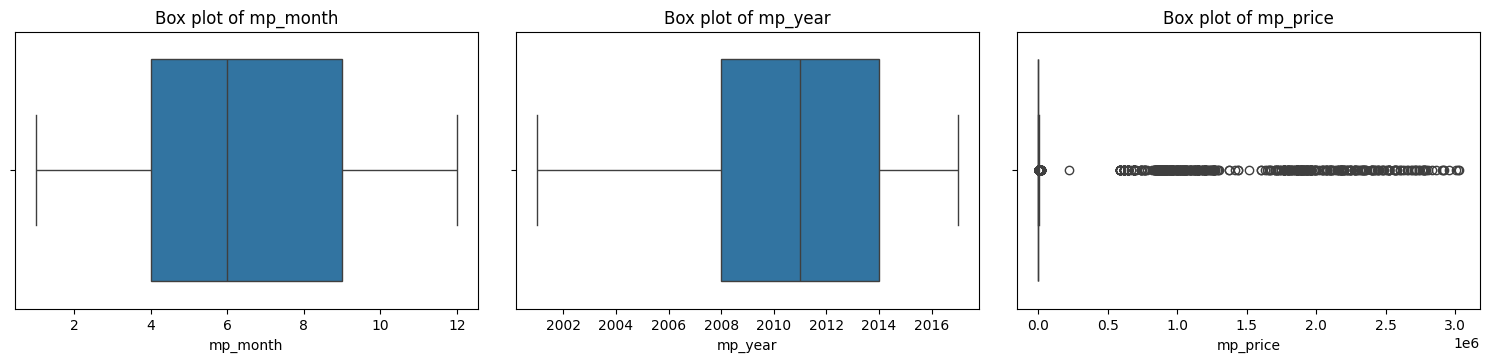

In [13]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Set the figure size
plt.figure(figsize=(15, 10))

# List of numerical columns to plot
numerical_columns = ['mp_month', 'mp_year', 'mp_price']

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each numerical column
    sns.boxplot(data=filtered_df_cleaned, x=column)
    plt.title(f'Box plot of {column}')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


We notice 'mp_month', 'mp_year' don't project alarming outliers. However, 'mp_price' shows alarming outliers. Since the goal of our project is to predict food prices, Let us shift our focus into understanding this price column for the countries we have chosen from.

# Group_by & Aggregate functions

In [14]:
# Group by Country and calculate the mean, median, and standard deviation of mp_price
country_price_summary = filtered_df_cleaned.groupby('Country')['mp_price'].agg(['mean', 'median', 'std', 'count']).reset_index()
country_price_summary.columns = ['Country', 'Mean Price', 'Median Price', 'Std Dev Price', 'Count']
print(country_price_summary,"\n")

# Group by locality_name
locality_price_summary = filtered_df_cleaned.groupby('locality_name')['mp_price'].agg(['mean', 'median', 'std', 'count']).reset_index()
locality_price_summary.columns = ['Locality Name', 'Mean Price', 'Median Price', 'Std Dev Price', 'Count']
print(locality_price_summary,"\n")

# Group by mkt_name
mkt_price_summary = filtered_df_cleaned.groupby('mkt_name')['mp_price'].agg(['mean', 'median', 'std', 'count']).reset_index()
mkt_price_summary.columns = ['Market Name', 'Mean Price', 'Median Price', 'Std Dev Price', 'Count']
print(mkt_price_summary,"\n")

# Group by cm_name
cm_price_summary = filtered_df_cleaned.groupby('cm_name')['mp_price'].agg(['mean', 'median', 'std', 'count']).reset_index()
cm_price_summary.columns = ['Commodity Name', 'Mean Price', 'Median Price', 'Std Dev Price', 'Count']
print(cm_price_summary,"\n")

# Group by mk_type_name
mk_type_price_summary = filtered_df_cleaned.groupby('mk_type_name')['mp_price'].agg(['mean', 'median', 'std', 'count']).reset_index()
mk_type_price_summary.columns = ['Market Type Name', 'Mean Price', 'Median Price', 'Std Dev Price', 'Count']
print(mk_type_price_summary,"\n")

       Country    Mean Price  Median Price  Std Dev Price  Count
0     Colombia  98431.743843     2080.0000  399183.226821   8296
1   Costa Rica   1115.828431     1113.6475     432.258274    297
2  El Salvador     42.141377       39.0000      24.166924   6011
3    Guatemala     64.279354       11.8900     104.635599   3001
4     Honduras    689.088573      675.2200     340.274247    523
5       Panama    719.040294      739.1300     263.699858    174 

         Locality Name     Mean Price  Median Price  Std Dev Price  Count
0            Antioquia   72722.968169    2575.00000  354604.070850   2387
1            Atlantico  271219.113143    1238.44500  599310.380905    350
2              Bolivar     738.702532     755.00000     173.810583     79
3               Boyaca     499.160120     464.00000     217.082631     83
4              Cabanas      41.920055      39.25000      25.470910    455
5                Cauca    2414.741379    2590.00000     456.541982     58
6                Cesar   

In [15]:
# Maximum Median Price by Country
max_country_index = country_price_summary['Median Price'].idxmax()
max_median_price_country = country_price_summary.loc[max_country_index]
print("Maximum Median Price by Country:", max_median_price_country['Country'], "with a price of:", max_median_price_country['Median Price'])

# Maximum Median Price by Locality Name
max_locality_index = locality_price_summary['Median Price'].idxmax()
max_median_price_locality = locality_price_summary.loc[max_locality_index]
print("Maximum Median Price by Locality Name:", max_median_price_locality['Locality Name'], "with a price of:", max_median_price_locality['Median Price'])

# Maximum Median Price by Market Name
max_market_index = mkt_price_summary['Median Price'].idxmax()
max_median_price_market = mkt_price_summary.loc[max_market_index]
print("Maximum Median Price by Market Name:", max_median_price_market['Market Name'], "with a price of:", max_median_price_market['Median Price'])

# Maximum Median Price by Commodity Name
max_commodity_index = cm_price_summary['Median Price'].idxmax()
max_median_price_commodity = cm_price_summary.loc[max_commodity_index]
print("Maximum Median Price by Commodity Name:", max_median_price_commodity['Commodity Name'], "with a price of:", max_median_price_commodity['Median Price'])

# Maximum Median Price by Market Type Name
max_market_type_index = mk_type_price_summary['Median Price'].idxmax()
max_median_price_market_type = mk_type_price_summary.loc[max_market_type_index]
print("Maximum Median Price by Market Type Name:", max_median_price_market_type['Market Type Name'], "with a price of:", max_median_price_market_type['Median Price'])


Maximum Median Price by Country: Colombia with a price of: 2080.0
Maximum Median Price by Locality Name: Sucre with a price of: 5300.0
Maximum Median Price by Market Name: Sincelejo with a price of: 5300.0
Maximum Median Price by Commodity Name: Rice (white) with a price of: 2047500.0
Maximum Median Price by Market Type Name: Wholesale with a price of: 642.19665


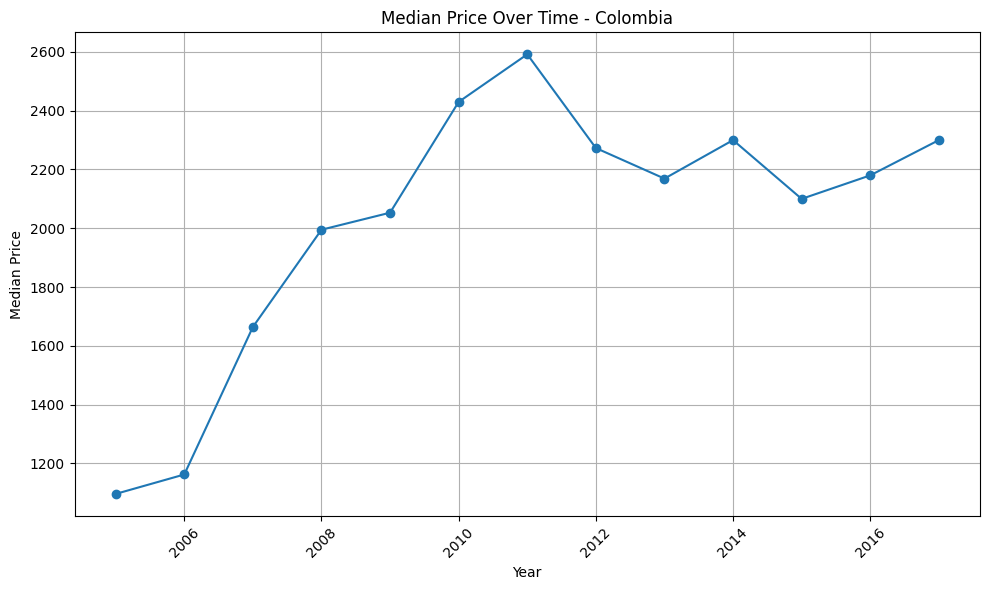

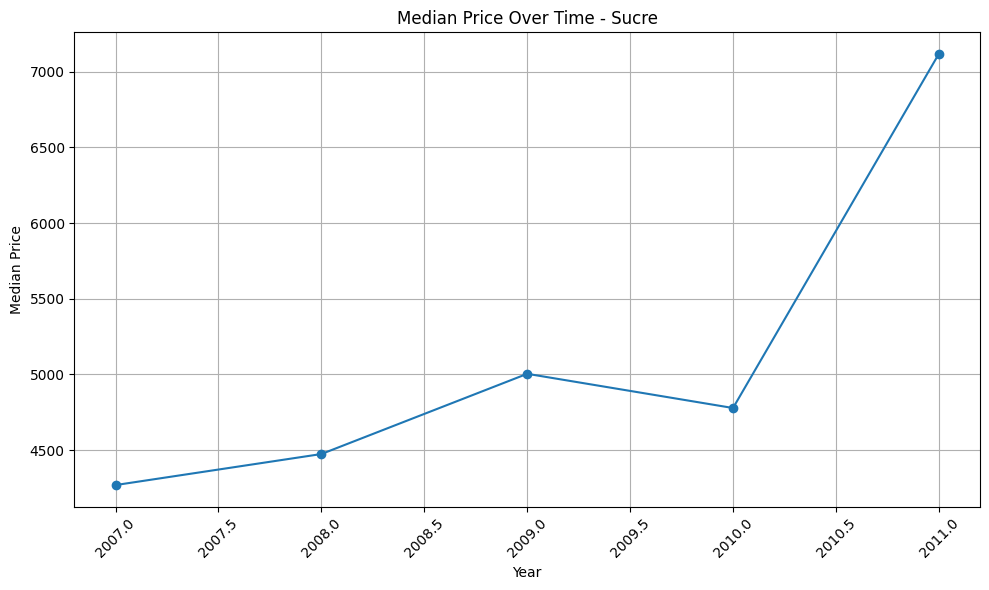

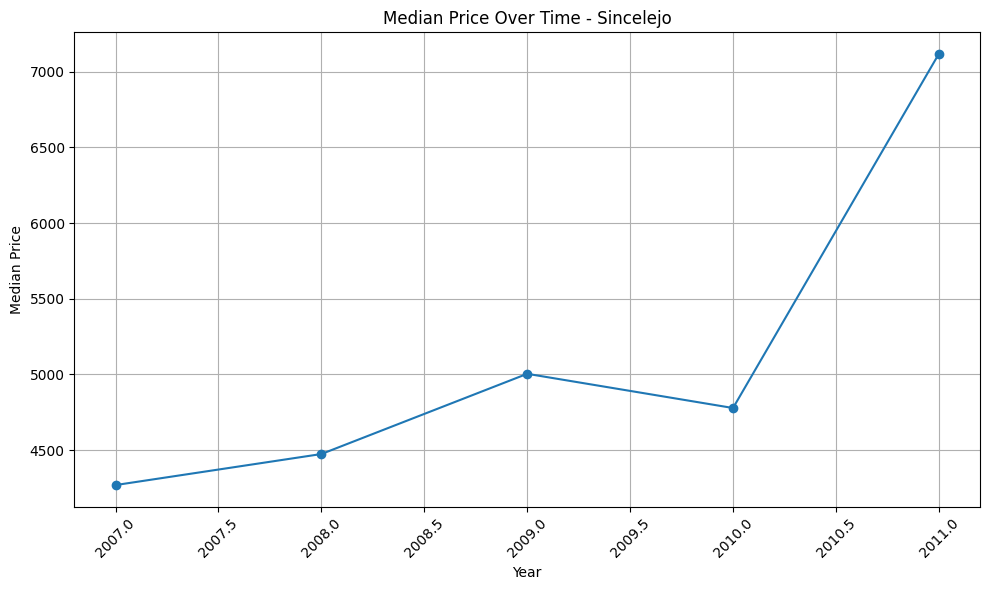

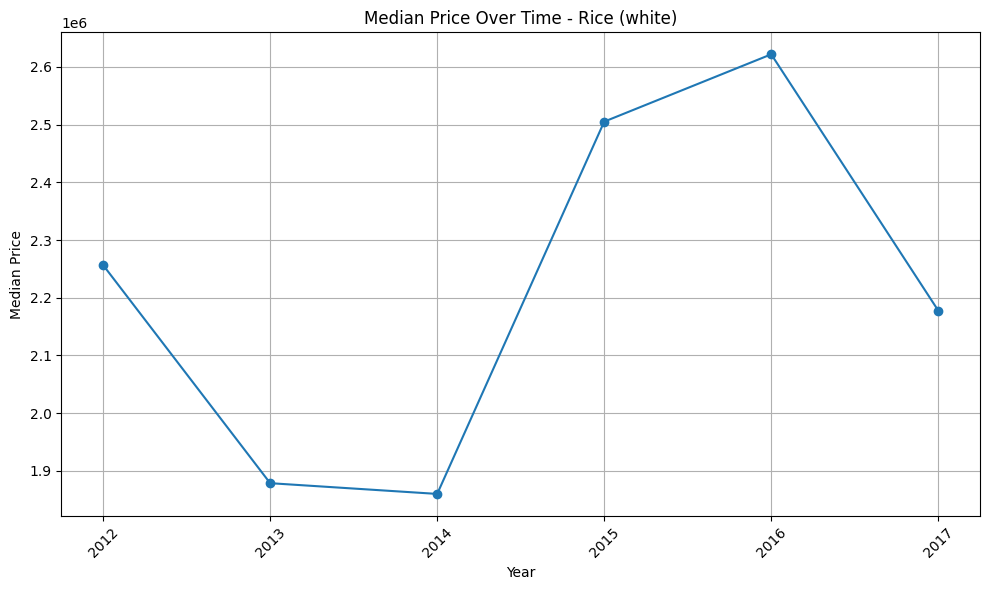

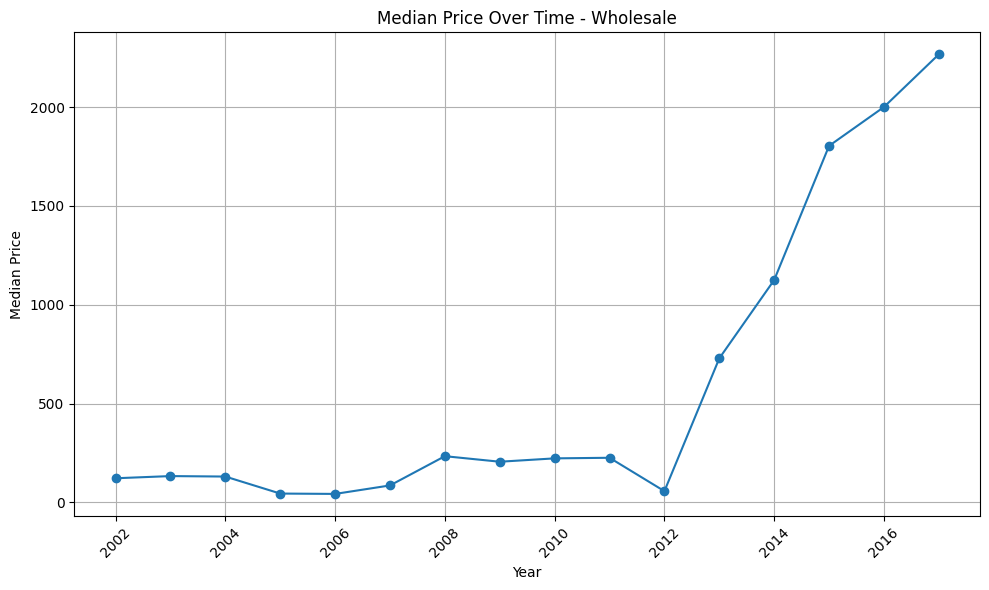

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a function to plot median prices for a given filter and title
def plot_median_price(data, title):
    median_data = data.groupby('mp_year')['mp_price'].median().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(median_data['mp_year'], median_data['mp_price'], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Median Price')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Filter and plot for Colombia
colombia_data = filtered_df_cleaned[filtered_df_cleaned['Country'] == 'Colombia']
plot_median_price(colombia_data, 'Median Price Over Time - Colombia')

# Filter and plot for Sucre
sucre_data = filtered_df_cleaned[filtered_df_cleaned['locality_name'] == 'Sucre']
plot_median_price(sucre_data, 'Median Price Over Time - Sucre')

# Filter and plot for Sincelejo
sincelejo_data = filtered_df_cleaned[filtered_df_cleaned['mkt_name'] == 'Sincelejo']
plot_median_price(sincelejo_data, 'Median Price Over Time - Sincelejo')

# Filter and plot for Rice (white)
rice_data = filtered_df_cleaned[filtered_df_cleaned['cm_name'] == 'Rice (white)']
plot_median_price(rice_data, 'Median Price Over Time - Rice (white)')

# Filter and plot for Wholesale
wholesale_data = filtered_df_cleaned[filtered_df_cleaned['mk_type_name'] == 'Wholesale']
plot_median_price(wholesale_data, 'Median Price Over Time - Wholesale')
